In [ ]:
# 2024-09-24

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from matplotlib import cm
from matplotlib.colors import Normalize

              times  speed     dir
0  2022-08-07 17:30  0.144  159.68
1  2022-08-07 17:40  0.255   96.99
2  2022-08-07 17:50  0.291   75.68
3  2022-08-07 18:00  0.135   64.57
4  2022-08-07 18:10  0.361   20.09
Index(['times', 'speed', 'dir'], dtype='object')


<Figure size 800x800 with 0 Axes>

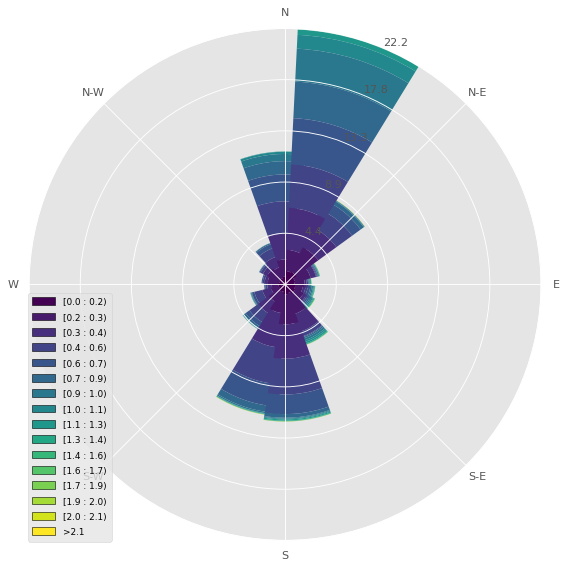

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from windrose import WindroseAxes   # 풍향도(wind rose)를 생성할 수 있는 클래스

df = pd.read_csv("VD.csv")

print(df.head())
print(df.columns)

plt.figure(figsize=(8,8))

ax = WindroseAxes.from_ax()

# ax.bar(df['dir'], df['speed'], normed=True, edgecolor='white')
ax.bar(df['dir'], df['speed'], normed=True, bins=16, alpha=1)

for patch in ax.patches:
    patch.set_width(0.5)

ax.set_legend()

plt.show()

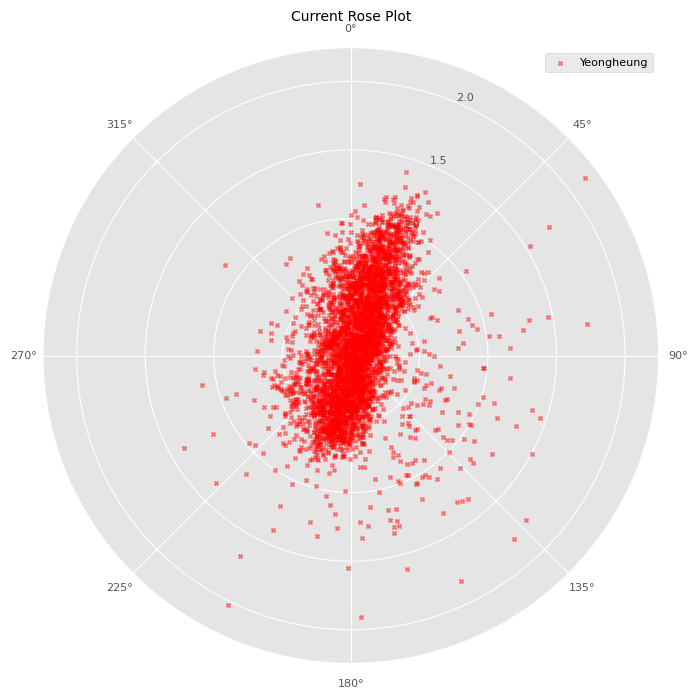

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # pandas 모듈 임포트 추가

# 데이터 로드
df = pd.read_csv("VD.csv")  # VD.csv 파일에서 데이터 로드

# 방향을 라디안으로 변환
theta = np.radians(df['dir'])

# 플롯 설정
plt.style.use('ggplot')

# 극좌표 플롯 생성
fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'projection': 'polar'})

# 마커 설정
marker_size = 8
ax.scatter(theta, df['speed'], marker='x', color='red', s=marker_size, alpha=0.5, label='Yeongheung')

# 제목 및 레이블 설정
ax.set_title("Current Rose Plot", va='top', fontsize=10)  # 제목 폰트 크기 조정

# 극좌표 설정
ax.set_theta_zero_location('N')  # 0도 위치를 북쪽으로 설정
ax.set_theta_direction(-1)        # 시계 방향으로 설정

# 레전드 설정
plt.legend(loc='upper right', fontsize=8)  # 레전드 폰트 크기 조정

# 그리드 설정
ax.grid(True)

# y축 그리드 간격을 0.5로 설정
ax.set_yticks(np.arange(0, 2.5, 0.5))  # 0부터 2.5까지 0.5 간격으로 눈금 설정
ax.tick_params(axis='both', labelsize=8)  # 눈금의 폰트 크기를 8로 설정

# 그래프 표시
plt.show()


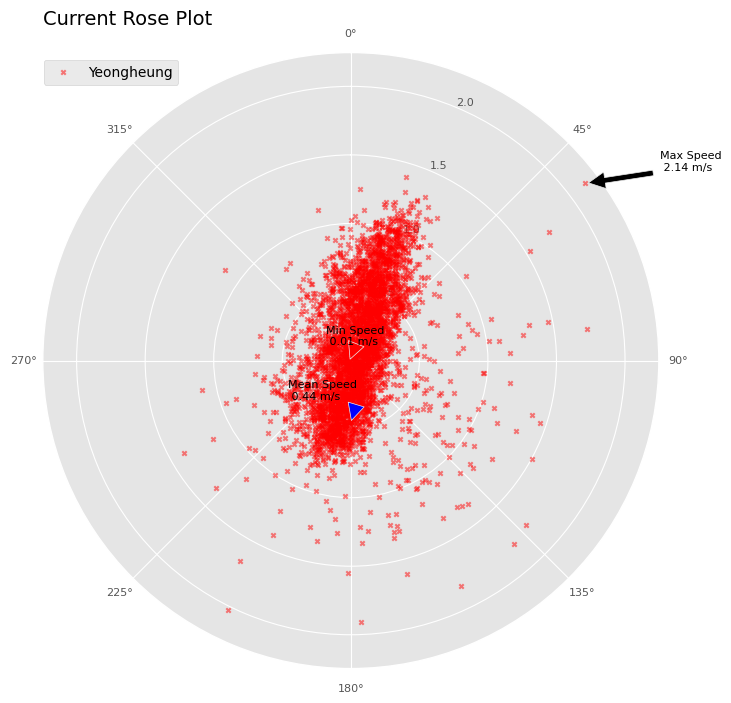

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("VD.csv")  

theta = np.radians(df['dir'])

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8,8) ,subplot_kw={'projection': 'polar'})

ax.scatter(theta, df['speed'], marker='x', color='red', s=10, alpha=0.5, label='Yeongheung')

max_speed = df['speed'].max()
min_speed = df['speed'].min()
mean_speed = df['speed'].mean()

# 최대 속도 주석 추가
max_theta = theta[df['speed'].idxmax()]
ax.annotate(f'Max Speed\n {max_speed:.2f} m/s', 
             xy=(max_theta, max_speed), 
             xytext=(max_theta + 0.1, max_speed + 0.5),
             xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05), 
             fontsize=8, color='black', ha='left', va='bottom')

# 최소 속도 주석 추가
min_theta = theta[df['speed'].idxmin()]
ax.annotate(f'Min Speed\n {min_speed:.2f} m/s', 
             xy=(min_theta, min_speed), 
             xytext=(min_theta - 0.1, min_speed + 0.2),
             xycoords='data', 
             arrowprops=dict(facecolor='red', shrink=0.05), 
             fontsize=8, color='black', ha='left', va='bottom')

# 평균 속도 주석 추가
mean_theta = theta[(df['speed'] - mean_speed).abs().idxmin()]
ax.annotate(f'Mean Speed\n {mean_speed:.2f} m/s', 
             xy=(mean_theta, mean_speed), 
             xytext=(mean_theta + 1.0, mean_speed + 0.1),
             xycoords='data',  
             arrowprops=dict(facecolor='blue', shrink=0.05), 
             fontsize=8, color='black', ha='left', va='bottom')

ax.set_title("Current Rose Plot", loc='left', va='top', fontsize=14)

ax.set_theta_zero_location('N') 
ax.set_theta_direction(-1)       

plt.legend(loc='upper left', bbox_to_anchor=(-0.01, 1.0), fontsize=10)

ax.grid(True)

ax.set_yticks(np.arange(0, 2.5, 0.5)) 
ax.tick_params(axis='both', labelsize=8)  

plt.show()
